In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# load the ADHD CSV dataset file into a DataFrame
df = pd.read_csv('questionnaire_dataset.csv', sep=';')

# info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 95 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  220 non-null    object
 1   group    220 non-null    int64 
 2   gender   220 non-null    int64 
 3   age      220 non-null    object
 4   nsc      220 non-null    int64 
 5   tr1      220 non-null    int64 
 6   tr2      220 non-null    int64 
 7   tr3      220 non-null    int64 
 8   tr4      220 non-null    int64 
 9   tr5      220 non-null    int64 
 10  tr6      220 non-null    int64 
 11  tr7      220 non-null    int64 
 12  tr8      220 non-null    int64 
 13  tr9      220 non-null    int64 
 14  tr10     220 non-null    int64 
 15  tr11     220 non-null    int64 
 16  tr12     220 non-null    int64 
 17  tr13     220 non-null    int64 
 18  tr14     220 non-null    int64 
 19  tr15     220 non-null    int64 
 20  tr16     220 non-null    int64 
 21  tr17     220 non-null    int64 
 22  tr

In [11]:
def get_strongly_correlated_features(df, threshold=0.7):
    # get strongly correlated features from a DataFrame above a certain threshold
    # returns a two lists of tuples containing pairs of strongly correlated features
    corr_matrix = df.corr()
    # get the upper triangle to prevent going through the same data twice
    corr_matrix_up = corr_matrix.where(np.triu(np.ones(corr_matrix.shape)).astype(bool))
    positively_correlated_features = []
    negatively_correlated_features = []

    for i in range(len(corr_matrix_up.columns)):
        for j in range(i):
            if (corr_matrix_up.iloc[j, i] > threshold):
                positively_correlated_features.append((corr_matrix_up.columns[j], corr_matrix_up.columns[i]))
            elif (corr_matrix_up.iloc[j, i] < -threshold):
                negatively_correlated_features.append((corr_matrix_up.columns[j], corr_matrix_up.columns[i]))    

    return positively_correlated_features, negatively_correlated_features

positively_correlated_features, negatively_correlated_features = get_strongly_correlated_features(df.filter(regex='tr'), threshold=0.85)
print("Strongly positively correlated features:", positively_correlated_features)
print("Strongly negatively correlated features:", negatively_correlated_features)


Strongly positively correlated features: [('tr1', 'tr6'), ('tr1', 'tr7'), ('tr3', 'tr8'), ('tr8', 'tr12'), ('tr1', 'tr17'), ('tr6', 'tr17'), ('tr3', 'tr22'), ('tr12', 'tr22'), ('tr15', 'tr23'), ('tr21', 'tr23'), ('tr9', 'tr24'), ('tr10', 'tr24'), ('tr12', 'tr24'), ('tr3', 'tr25'), ('tr8', 'tr25'), ('tr12', 'tr25'), ('tr22', 'tr25'), ('tr14', 'tr26'), ('tr19', 'tr26'), ('tr8', 'tr28'), ('tr9', 'tr28'), ('tr10', 'tr28'), ('tr12', 'tr28'), ('tr24', 'tr28'), ('tr16', 'tr30'), ('tr12', 'tr31'), ('tr8', 'tr33'), ('tr9', 'tr33'), ('tr10', 'tr33'), ('tr12', 'tr33'), ('tr21', 'tr33'), ('tr24', 'tr33'), ('tr28', 'tr33'), ('tr8', 'tr34'), ('tr9', 'tr34'), ('tr10', 'tr34'), ('tr12', 'tr34'), ('tr24', 'tr34'), ('tr28', 'tr34'), ('tr33', 'tr34'), ('tr17', 'tr36'), ('tr26', 'tr36'), ('tr36', 'tr37'), ('tr27', 'tr38'), ('tr37', 'tr38'), ('tr22', 'tr41'), ('tr25', 'tr41'), ('tr27', 'tr42'), ('tr33', 'tr43')]
Strongly negatively correlated features: []


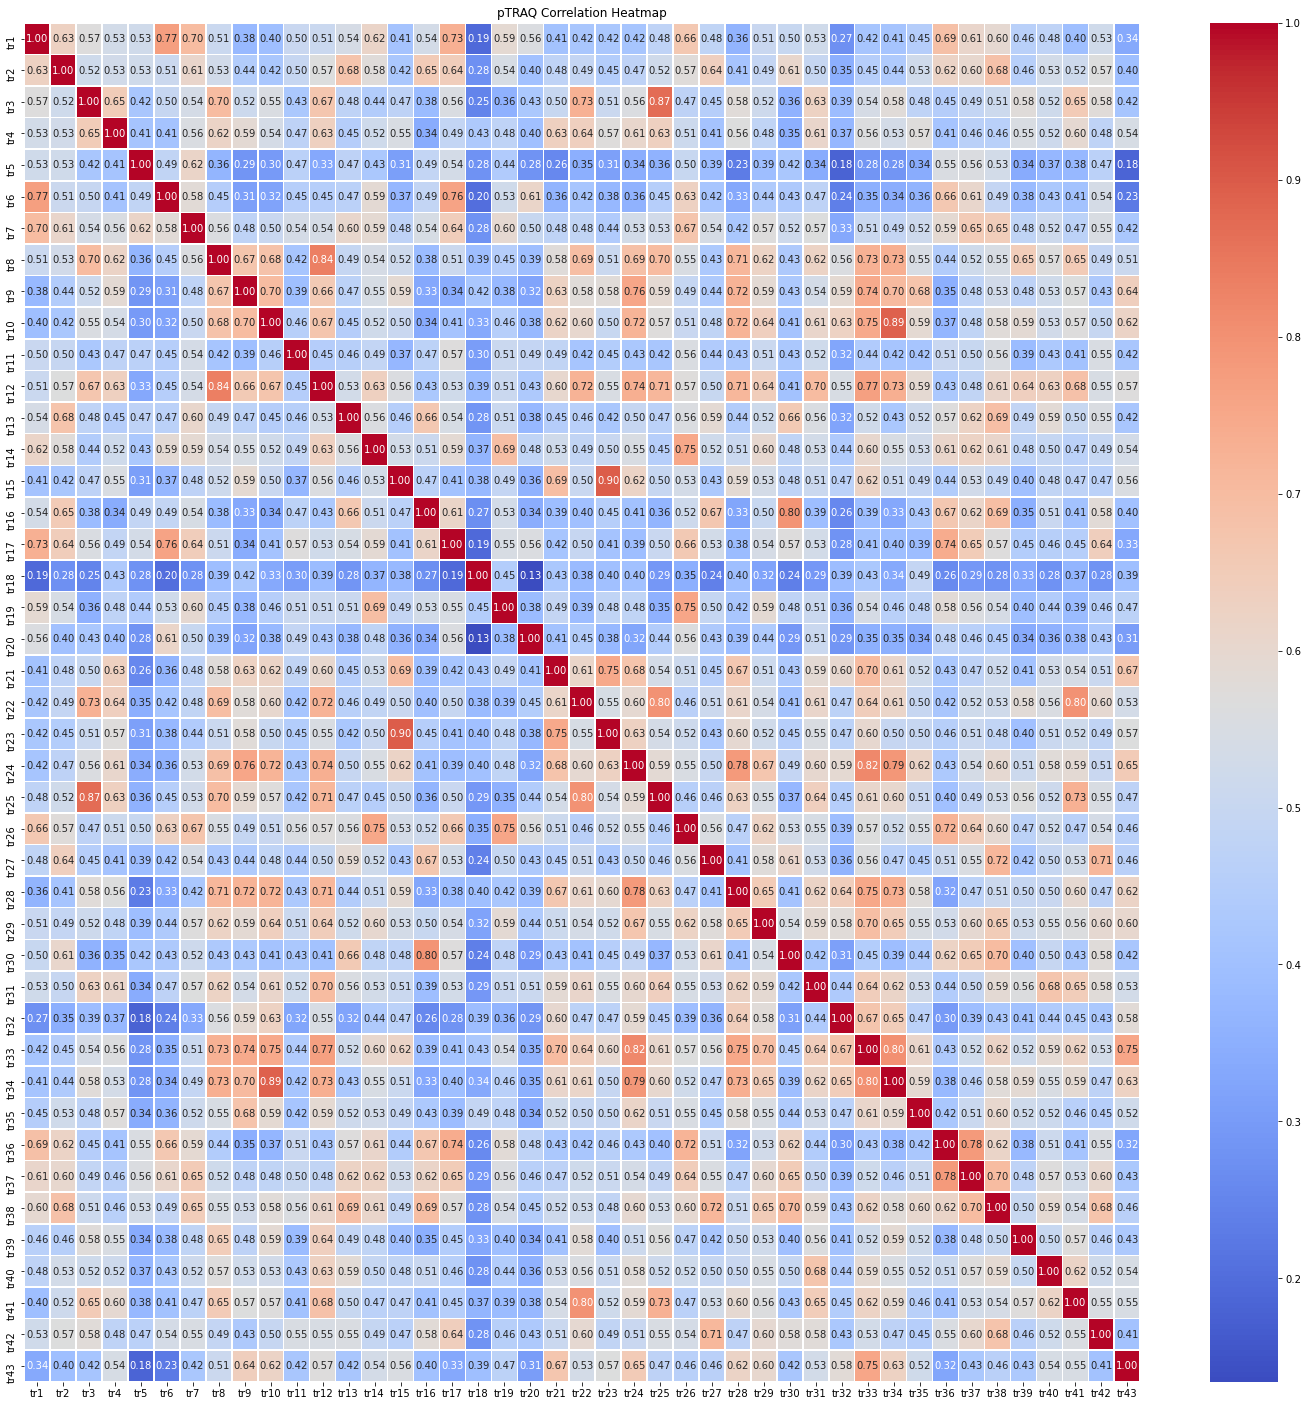

In [113]:
df_tr = df.filter(regex='tr')
#df_tr.hist(figsize=(20,20))

# pTRAQ correlation matrix
df_tr_corr = df_tr.corr()
# correlation heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(df_tr_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('pTRAQ Correlation Heatmap')
plt.show()

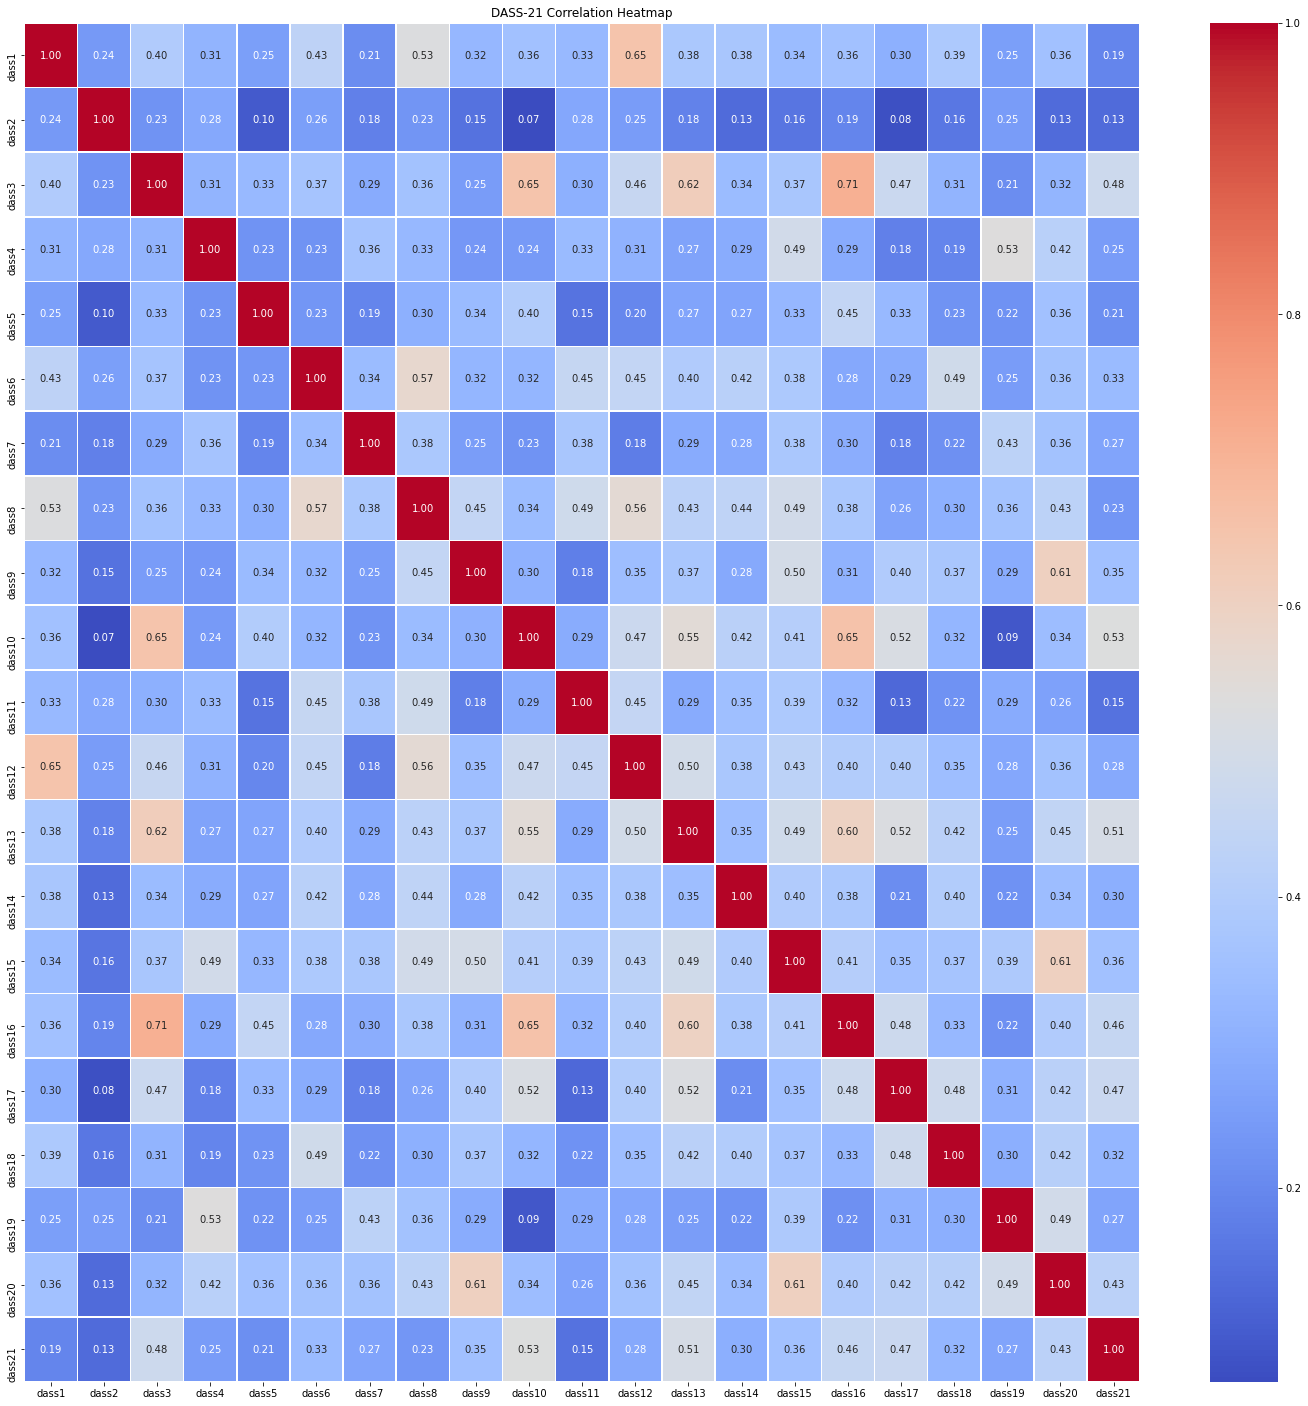

In [118]:
df_dass = df.filter(regex='dass')
#df_dass.hist(figsize=(20,20))

# DASS-21 correlation matrix
df_dass_corr = df_dass.corr()
# correlation heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(df_dass_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('DASS-21 Correlation Heatmap')
plt.show()

In [48]:
# show first 5 rows
df.head(5)

,subject,group,gender,age,nsc,tr1,tr2,tr3,tr4,tr5,...,demo17,demo18,demo19,demo20,demo21,demo22,demo23,demo24,demo25,demo26
0,S01,1,0,35,1,5,6,5,3,6,...,4,4,1,2,4,3,1,2,4,3
1,S02,1,1,25,4,5,3,5,5,6,...,4,2,1,2,4,3,1,4,4,4
2,S03,1,1,18,2,5,5,6,5,5,...,4,4,1,2,4,3,1,2,4,3
3,S04,1,1,40,2,6,6,6,6,5,...,4,2,1,2,4,3,1,4,4,4
4,S05,1,0,29,2,4,6,6,6,3,...,2,2,2,2,4,3,2,2,4,2


In [49]:
# describe the dataframe
df.describe()

,group,gender,nsc,tr1,tr2,tr3,tr4,tr5,tr6,tr7,...,demo17,demo18,demo19,demo20,demo21,demo22,demo23,demo24,demo25,demo26
count,220.00000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.50000,0.195455,2.745455,3.513636,3.790909,4.959091,4.481818,4.013636,3.690909,3.259091,...,3.536364,2.640909,1.413636,2.045455,3.604545,2.963636,1.359091,2.131818,3.531818,2.886364
std,0.50114,0.397455,0.905956,1.608992,1.619490,1.300916,1.457037,1.637125,1.678472,1.699089,...,0.754618,1.017275,0.797711,0.935220,0.754274,0.987846,0.772329,1.000405,0.818667,0.886631
min,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.00000,0.000000,2.000000,2.000000,2.000000,4.000000,3.750000,3.000000,2.000000,2.000000,...,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000
50%,0.50000,0.000000,3.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,1.000000,2.000000,4.000000,3.000000,1.000000,2.000000,4.000000,3.000000
75%,1.00000,0.000000,3.000000,5.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,...,4.000000,3.000000,2.000000,3.000000,4.000000,4.000000,1.000000,3.000000,4.000000,4.000000
max,1.00000,1.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


There are 110 ADHD and 110 non-ADHD people in each group. Group 1 has been diagnosed with ADHD, group 2 does not have an ADHD diagnosis.

There are 3 questionnaires that each person has completed.
1. TRAQ10 - new questionnaire based off DSM-5 list of symptoms / behavioural ADHD traits
2. DASS21 - Depression, Anxiety and Stress Scale 21-item scale
3. DEMO - Scale of Adherence to the Values of the Ideal Democracy, used as a “negative-control scale”

Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9202159/

In [50]:
# split the dataset into adhd and not adhd group
mixed_adhd_df = df[df['group'] == 1] 
mixed_no_adhd_df = df[df['group'] == 0] 

# split the data further by gender
women_adhd_df = mixed_adhd_df[mixed_adhd_df['gender'] == 0] 
men_adhd_df = mixed_adhd_df[mixed_adhd_df['gender'] == 1]
women_no_adhd_df = mixed_adhd_df[mixed_adhd_df['gender'] == 0]
men_no_adhd_df = mixed_adhd_df[mixed_adhd_df['gender'] == 1]

print(f'Gender split (female/male) of the adhd data: {len(women_adhd_df)}/{len(men_adhd_df)}')
print(f'Gender split (female/male) of the non adhd data: {len(women_adhd_df)}/{len(men_adhd_df)}')

Gender split (female/male) of the adhd data: 86/24
Gender split (female/male) of the non adhd data: 86/24


In [93]:
# pTRAQ questions
# load the pTRAQ questions description CSV dataset file into a DataFrame
ptraq_questions = pd.read_csv('pTRAQ_questions.csv', sep=';')
# drop last row
ptraq_questions.drop(ptraq_questions.index[-1], inplace=True) 

In [94]:
# add a column corresponding to the questionnaire dataset 
ptraq_questions = ptraq_questions.assign(question_code=[f'tr{i}' for i in range(1,43+1)])
ptraq_questions.head()

,Critère DSM-5,ID Critère,ID Projet,French Item (Validated),English Item (Author's suggestion),question_code
0,A,A1,pTRAQ1,Je ne prête pas vraiment attention aux détails,I don't really pay attention to details,tr1
1,A,A2,pTRAQ2,On me reproche des imprécisions dans mon travail,I have been accused of inaccuracies in my work,tr2
2,A,A3,pTRAQ3,Je fais souvent des fautes d’étourderie dans m...,I often make careless mistakes in my activities,tr3
3,B,B1,pTRAQ4,J’ai du mal à maintenir mon attention au travail,I have trouble maintaining my attention at work.,tr4
4,B,B2,pTRAQ5,J’ai des difficultés à rester concentré pendan...,I have difficulty staying focused while readin...,tr5


In [97]:
# DASS-21 questionnaire questions
dass21_questions = pd.read_csv('DASS21_questions.csv', sep=';')
# add a column corresponding to the questionnaire dataset 
dass21_questions = dass21_questions.assign(question_code=[f'dass{i}' for i in range(1,21+1)])
dass21_questions.head()

,question number,area,question,question_code
0,1,s,I found it hard to wind down,dass1
1,2,a,I was aware of dryness of my mouth,dass2
2,3,d,I couldn’t seem to experience any positive fee...,dass3
3,4,a,I experienced breathing difficulty (e.g. exces...,dass4
4,5,d,I found it difficult to work up the initiative...,dass5


DASS-21:

The rating scale is as follows:
0 Did not apply to me at all
1 Applied to me to some degree, or some of the time
2 Applied to me to a considerable degree or a good part of time
3 Applied to me very much or most of the time

Source: https://www.bristol.ac.uk/media-library/sites/sps/documents/c-change/dass.pdf